## Hash Table

The reason Hash Tables are sometimes preferred instead of arrays or linked lists is because searching for, adding, and deleting data can be done really quickly, even for large amounts of data.

In a Linked List, finding a person "Bob" takes time because we would have to go from one node to the next, checking each node, until the node with "Bob" is found.

And finding "Bob" in an Array could be fast if we knew the index, but when we only know the name "Bob", we need to compare each element (like with Linked Lists), and that takes time.

With a Hash Table however, finding "Bob" is done really fast because there is a way to go directly to where "Bob" is stored, using something called a hash function.

## Building A Hash Table from Scratch

Step 1: Starting with an array

Using an array, we could store names like this:

my_array = ['Pete', 'Jones', 'Lisa', 'Bob', 'Siri']

To find "Bob" in this array, we need to compare each name, element by element, until we find "Bob".

If the array was sorted alphabetically, we could use Binary Search to find a name quickly, but inserting or deleting names in the array would mean a big operation of shifting elements in memory.

To make interacting with the list of names really fast, let's use a Hash Table for this instead, or a Hash Set, which is a simplified version of a Hash Table.

To keep it simple, let's assume there is at most 10 names in the list, so the array must be a fixed size of 10 elements. When talking about Hash Tables, each of these elements is called a bucket.

my_hash_set = [None,None,None,None,None,None,None,None,None,None]

## Step 2: Storing names using a hash function

Now comes the special way we interact with the Hash Set we are making.

We want to store a name directly into its right place in the array, and this is where the hash function comes in.

A hash function can be made in many ways, it is up to the creator of the Hash Table. A common way is to find a way to convert the value into a number that equals one of the Hash Set's index numbers, in this case a number from 0 to 9. In our example we will use the Unicode number of each character, summarize them and do a modulo 10 operation to get index numbers 0-9.

In [2]:
def hash_function(value):
    sum_of_chars = 0
    for char in value:
        sum_of_chars += ord(char)

    return sum_of_chars % 10

print("'Bob' has hash code:",hash_function('Bob'))

'Bob' has hash code: 5


The character "B" has Unicode code point 66, "o" has 111, and "b" has 98. Adding those together we get 275. Modulo 10 of 275 is 5, so "Bob" should be stored as an array element at index 5.

The number returned by the hash function is called the hash code.

Unicode number: Everything in our computers are stored as numbers, and the Unicode code point is a unique number that exist for every character. For example, the character A has Unicode number (also called Unicode code point) 65

After storing "Bob" where the hash code tells us (index 5), our array now looks like this:

In [3]:
my_hash_set = [None,None,None,None,None,'Bob',None,None,None,None]

We can use the hash function to find out where to store the other names "Pete", "Jones", "Lisa", and "Siri" as well.

After using the hash function to store those names in the correct position, our array looks like this:

In [4]:
my_hash_set = [None,'Jones',None,'Lisa',None,'Bob',None,'Siri','Pete',None]

## Step 3: Looking up a name using a hash function

We have now established a super basic Hash Set, because we do not have to check the array element by element anymore to find out if "Pete" is in there, we can just use the hash function to go straight to the right element!

To find out if "Pete" is stored in the array, we give the name "Pete" to our hash function, we get back hash code 9, we go directly to the element at index 9, and there he is. We found "Pete" without checking any other elements.

In [5]:
my_hash_set = [None,'Jones',None,'Lisa',None,'Bob',None,'Siri','Pete',None]

def hash_function(value):
    sum_of_chars = 0
    for char in value:
        sum_of_chars += ord(char)

    return sum_of_chars % 10
    
def contains(name):
    index = hash_function(name)
    return my_hash_set[index] == name

print("'Pete' is in the Hash Set:",contains('Pete'))

'Pete' is in the Hash Set: True


When deleting a name from our Hash Set, we can also use the hash function to go straight to where the name is, and set that element value to None.

## Step 4: Handling collisions

Let's also add "Stuart" to our Hash Set.

We give "Stuart" to our hash function, and we get the hash code 3, meaning "Stuart" should be stored at index 3.

Trying to store "Stuart" creates what is called a collision, because "Lisa" is already stored at index 3.

To fix the collision, we can make room for more elements in the same bucket, and solving the collision problem in this way is called chaining. We can give room for more elements in the same bucket by implementing each bucket as a linked list, or as an array.

After implementing each bucket as an array, to give room for potentially more than one name in each bucket, "Stuart" can also be stored at index 3, and our Hash Set now looks like this:

In [6]:
my_hash_set = [
    [None],
    ['Jones'],
    [None],
    ['Lisa', 'Stuart'],
    [None],
    ['Bob'],
    [None],
    ['Siri'],
    ['Pete'],
    [None]
]

Searching for "Stuart" in our Hash Set now means that using the hash function we end up directly in bucket 3, but then be must first check "Lisa" in that bucket, before we find "Stuart" as the second element in bucket 3.

In [7]:
my_hash_set = [
    [None],
    ['Jones'],
    [None],
    ['Lisa'],
    [None],
    ['Bob'],
    [None],
    ['Siri'],
    ['Pete'],
    [None]
]

def hash_function(value):
    return sum(ord(char) for char in value) % 10
    
def add(value):
    index = hash_function(value)
    bucket = my_hash_set[index]
    if value not in bucket:
        bucket.append(value)
        
def contains(value):
    index = hash_function(value)
    bucket = my_hash_set[index]
    return value in bucket

add('Stuart')

print(my_hash_set)
print('Contains Stuart:',contains('Stuart'))

[[None], ['Jones'], [None], ['Lisa', 'Stuart'], [None], ['Bob'], [None], ['Siri'], ['Pete'], [None]]
Contains Stuart: True


## Uses of Hash Tables

Hash Tables are great for:

Checking if something is in a collection (like finding a book in a library).
Storing unique items and quickly finding them (like storing phone numbers).
Connecting values to keys (like linking names to phone numbers).
The most important reason why Hash Tables are great for these things is that Hash Tables are very fast compared Arrays and Linked Lists, especially for large sets. Arrays and Linked Lists have time complexity O(n) for search and delete, while Hash Tables have just O(1) on average

## Hash Set vs. Hash Map

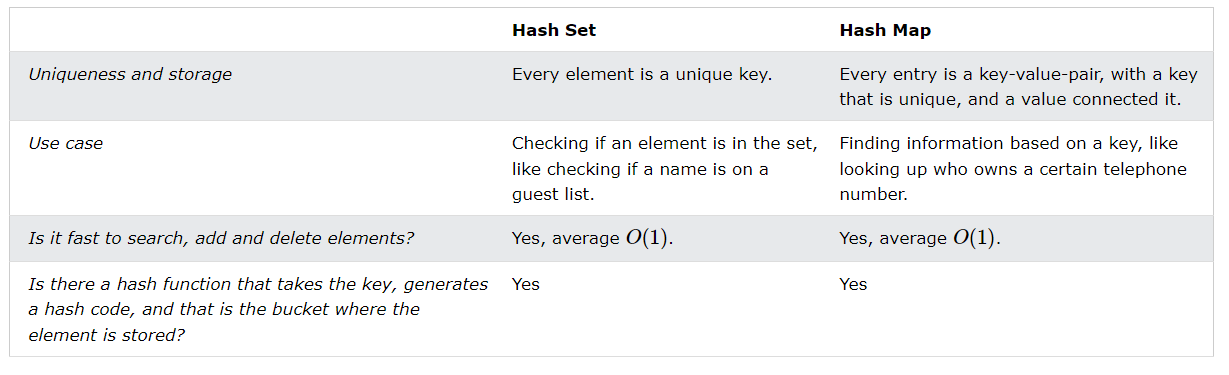

## Hash Tables Summarized

Hash Table elements are stored in storage containers called buckets.

Every Hash Table element has a part that is unique that is called the key.

A hash function takes the key of an element to generate a hash code.

The hash code says what bucket the element belongs to, so now we can go directly to that Hash Table element: to modify it, or to delete it, or just to check if it exists. Specific hash functions are explained in detail on the next two pages.

A collision happens when two Hash Table elements have the same hash code, because that means they belong to the same bucket. A collision can be solved in two ways.

Chaining is the way collisions are solved in this tutorial, by using arrays or linked lists to allow more than one element in the same bucket.

Open Addressing is another way to solve collisions. With open addressing, if we want to store an element but there is already an element in that bucket, the element is stored in the next available bucket. This can be done in many different ways, but we will not explain open addressing any further here.